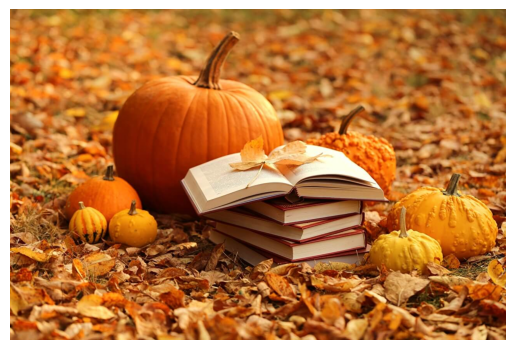

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/2.jpg'
I = cv2.imread(image_path)
I_ = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

plt.imshow(I_)
plt.axis('off')
plt.show()

Построение гистограмм

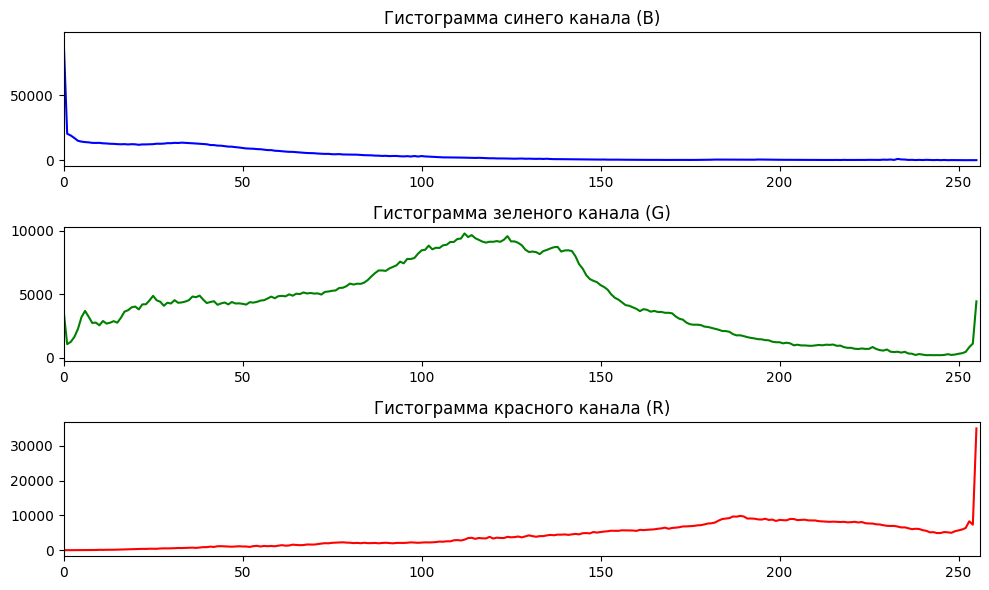

In [ ]:
# Number of histogram bins
histSize = 256
# Histogram range
# The upper boundary is exclusive
histRange = (0, 256)
# Split an image into color layers
I_BGR = cv2.split(I)

# Calculate a histogram for each layer
bHist = cv2.calcHist (I_BGR, [0], None,
[histSize], histRange)
gHist = cv2 . calcHist ( I_BGR , [1] , None ,
[ histSize ] , histRange )
rHist = cv2 . calcHist ( I_BGR , [2] , None ,
[ histSize ] , histRange )

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(bHist, color='blue')
plt.title('Гистограмма синего канала (B)')
plt.xlim([0, 256])

plt.subplot(3, 1, 2)
plt.plot(gHist, color='green')
plt.title('Гистограмма зеленого канала (G)')
plt.xlim([0, 256])

plt.subplot(3, 1, 3)
plt.plot(rHist, color='red')
plt.title('Гистограмма красного канала (R)')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


Выравниваем гистограмму синего канала, так как много значений находится слева.
Метод - сдвиг вправо.

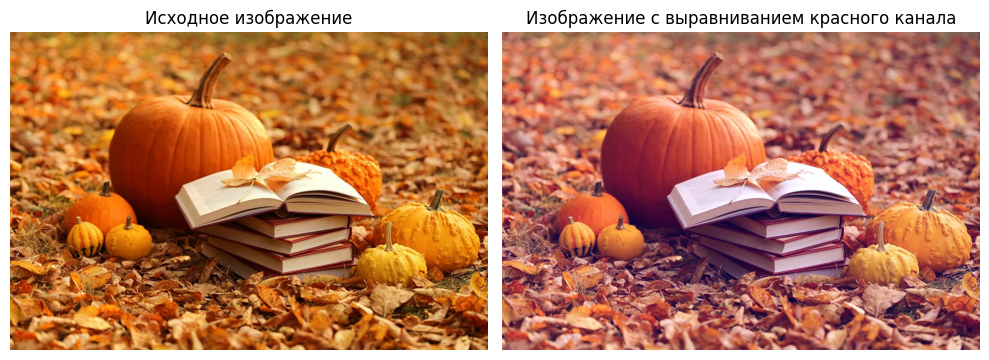

In [ ]:
# Выравнивание гистограммы синего канала

# Разделяем изображение на BGR-компоненты
B, G, R = cv2.split(I)

# Преобразуем значения пикселей в диапазоне [0, 1]
B_normalized = B.astype(np.float32) / 255.0

# Применяем формулу выравнивания гистограммы
B_adjusted = B_normalized + (50 / 255.0)

# Обрезаем значения, чтобы они находились в диапазоне [0, 1]
B_adjusted = np.clip(B_adjusted, 0, 1)

# Преобразуем значения обратно в диапазон [0, 255]
B_adjusted = (B_adjusted * 255).astype(np.uint8)

# Собираем обратно изображение с обновленным синим каналом
I_new = cv2.merge([B_adjusted, G, R])

# Отображение исходного и преобразованного изображения
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(I_new, cv2.COLOR_BGR2RGB))
plt.title('Изображение с выравниванием красного канала')
plt.axis('off')

plt.tight_layout()
plt.show()

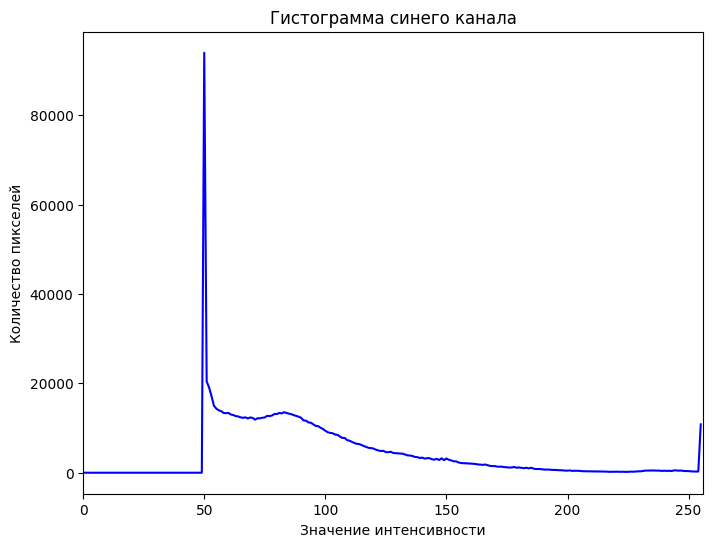

In [ ]:
# Гистограмма синего канала после сдвига
bHist = cv2.calcHist([B_adjusted], [0], None, [histSize], histRange)

# Отображаем гистограмму
plt.figure(figsize=(8, 6))
plt.plot(bHist, color='blue')  # Построение графика гистограммы
plt.title('Гистограмма синего канала')
plt.xlabel('Значение интенсивности')
plt.ylabel('Количество пикселей')
plt.xlim([0, 256])  # Ограничиваем ось x
plt.show()

Сдвиг гистограммы красного канала влево по такому же принципу

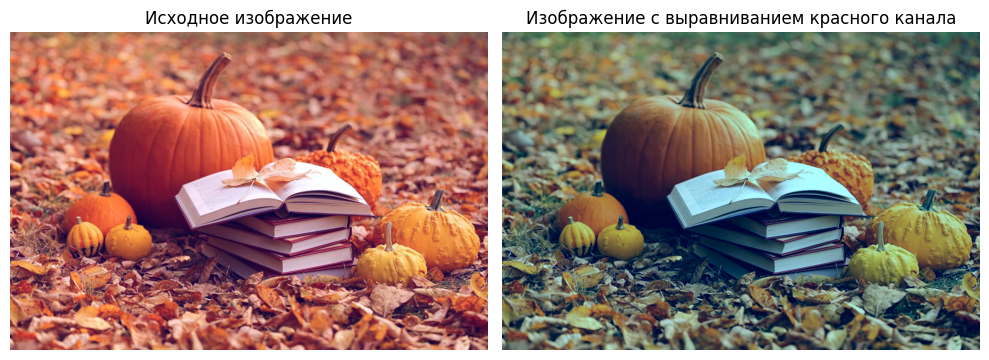

In [ ]:
# Сдвиг красного канала влево
# Разделяем изображение на BGR-компоненты
B, G, R = cv2.split(I_new)

# Преобразуем значения пикселей в диапазоне [0, 1]
R_normalized = R.astype(np.float32) / 255.0

# Применяем формулу выравнивания гистограммы
R_adjusted = R_normalized - (80 / 255.0)

# Обрезаем значения, чтобы они находились в диапазоне [0, 1]
R_adjusted = np.clip(R_adjusted, 0, 1)

# Преобразуем значения обратно в диапазон [0, 255]
R_adjusted = (R_adjusted * 255).astype(np.uint8)

# Собираем обратно изображение с обновленным синим каналом
I_newR = cv2.merge([B, G, R_adjusted])

# Отображение исходного и преобразованного изображения
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(I_new, cv2.COLOR_BGR2RGB))
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(I_newR, cv2.COLOR_BGR2RGB))
plt.title('Изображение с выравниванием красного канала')
plt.axis('off')

plt.tight_layout()
plt.show()

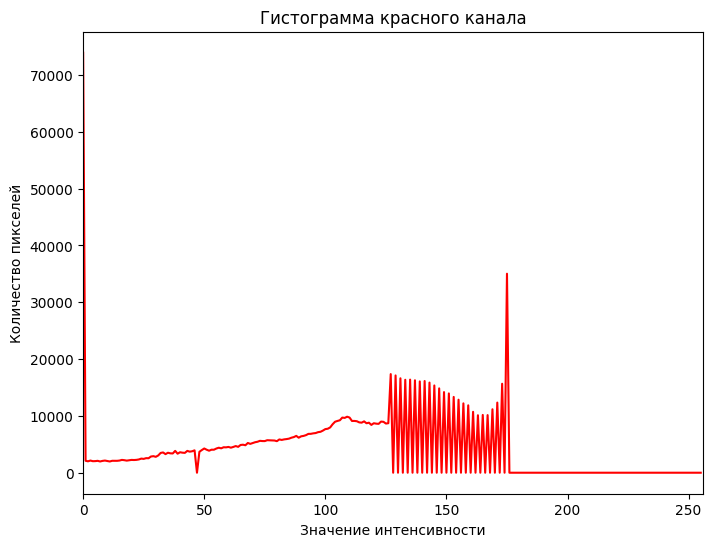

In [ ]:
# Гистограмма красного канала после преобразования
# Гистограмма синего канала после сдвига
rHist = cv2.calcHist([R_adjusted], [0], None, [histSize], histRange)

# Отображаем гистограмму
plt.figure(figsize=(8, 6))
plt.plot(rHist, color='Red')  # Построение графика гистограммы
plt.title('Гистограмма красного канала')
plt.xlabel('Значение интенсивности')
plt.ylabel('Количество пикселей')
plt.xlim([0, 256])  # Ограничиваем ось x
plt.show()

Растянем гистограмму, так как она неравномерна

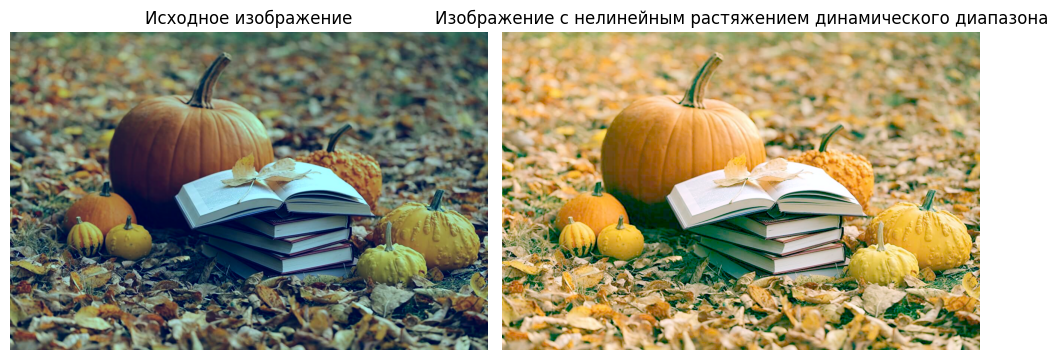

In [ ]:
# Растяжение
alfa = 0.5
# Convert to floating point
if I . dtype == np . uint8 :
  I_newR2 = I_newR . astype ( np . float32 ) / 255
else:
  I_newR2 = I_newR
# We need to process layers separately
I_BGR = cv2 . split ( I_newR2 )
Inew_BGR = []
for layer in I_BGR :
    Imin = layer . min ()
    Imax = layer . max ()
    Inew = np . clip (((( layer - Imin ) /
    ( Imax - Imin )) ** alfa ) , 0 , 1)
    Inew_BGR . append ( Inew )
# Merge back
Inew = cv2 . merge ( Inew_BGR )
# Convert back to uint if needed
if ( I . dtype == np . uint8 ):
  I_newR2 = (255 * Inew ). clip (0 , 255). \
  astype ( np . uint8 )

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(I_newR, cv2.COLOR_BGR2RGB))
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(I_newR2, cv2.COLOR_BGR2RGB))
plt.title('Изображение с нелинейным растяжением динамического диапазона')
plt.axis('off')

plt.tight_layout()
plt.show()

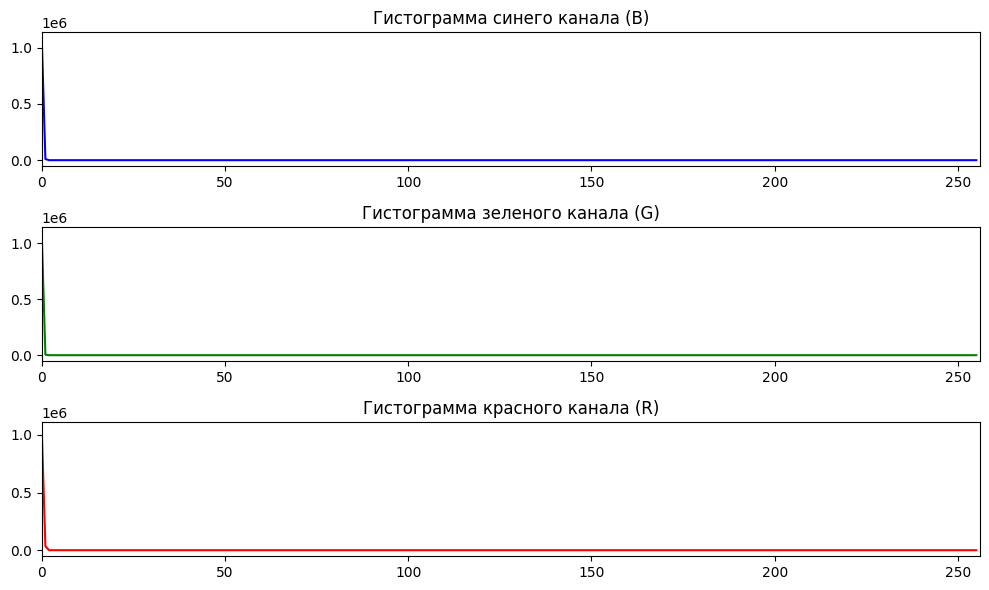

In [ ]:
# Гистограммы каналов после растяжения
# Split an image into color layers

I_BGR = cv2.split(Inew)

# Calculate a histogram for each layer
bHist = cv2.calcHist (I_BGR, [0], None,
[histSize], histRange)
gHist = cv2 . calcHist ( I_BGR , [1] , None ,
[ histSize ] , histRange )
rHist = cv2 . calcHist ( I_BGR , [2] , None ,
[ histSize ] , histRange )

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(bHist, color='blue')
plt.title('Гистограмма синего канала (B)')
plt.xlim([0, 256])

plt.subplot(3, 1, 2)
plt.plot(gHist, color='green')
plt.title('Гистограмма зеленого канала (G)')
plt.xlim([0, 256])

plt.subplot(3, 1, 3)
plt.plot(rHist, color='red')
plt.title('Гистограмма красного канала (R)')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


Построим проекции для второго входного изображения на Oy и Ox

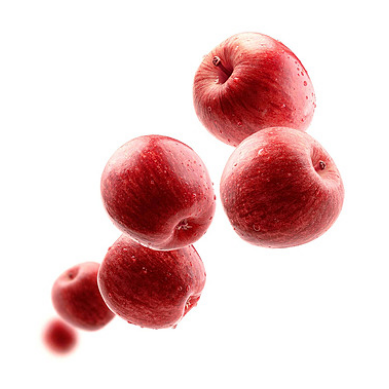

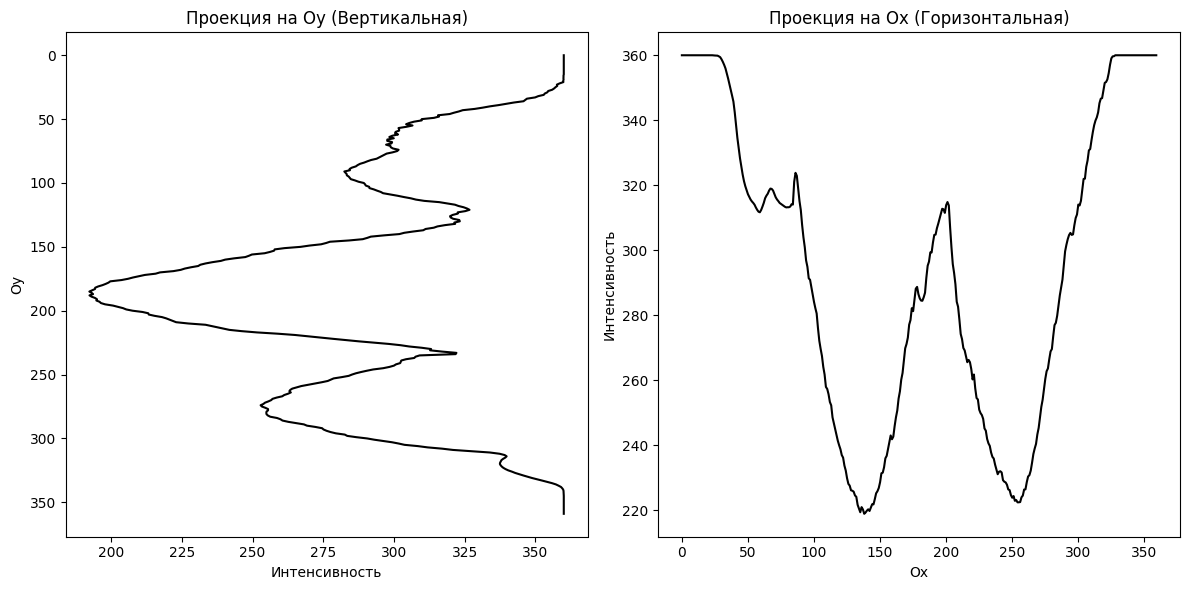

In [ ]:
# Проекции
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/ол.jpg'
I = cv2.imread(image_path)
I_ = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

plt.imshow(I_)
plt.axis('off')
plt.show()

if I is None:
    print("Ошибка при загрузке изображения")
else:
    # Преобразуем изображение в градации серого (если изображение цветное)
    if I.ndim == 3:  # Проверка, если изображение имеет 3 канала (BGR)
        gray_image = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = I

    # Вычисление проекций на ось Oy (вертикальная проекция)
    proj_Oy = np.sum(gray_image, axis=1) / 255

    # Вычисление проекций на ось Ox (горизонтальная проекция)
    proj_Ox = np.sum(gray_image, axis=0) / 255

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Вертикальная проекция (Oy)
    ax1.plot(proj_Oy, range(len(proj_Oy)), color='black')
    ax1.set_title('Проекция на Oy (Вертикальная)')
    ax1.set_xlabel('Интенсивность')
    ax1.set_ylabel('Oy')
    ax1.invert_yaxis()  # Инвертируем ось Y для корректного отображения

    # Горизонтальная проекция (Ox)
    ax2.plot(range(len(proj_Ox)), proj_Ox, color='black')
    ax2.set_title('Проекция на Ox (Горизонтальная)')
    ax2.set_xlabel('Ox')
    ax2.set_ylabel('Интенсивность')

    plt.tight_layout()
    plt.show()

Построим профиль изображения вдоль штрих-кода

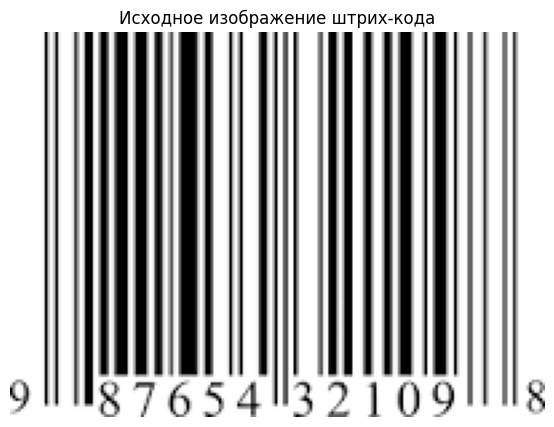

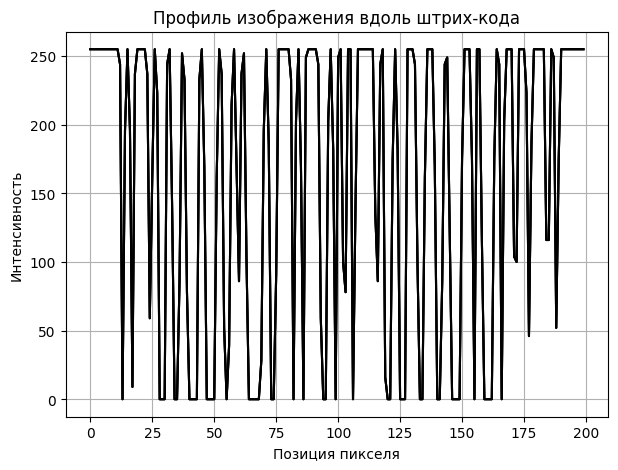

In [ ]:
# Штрих-код
import matplotlib.pyplot as plt
import cv2

I = cv2.imread( "/content/штрих.png", cv2.IMREAD_COLOR )
profile = I [ round ( I . shape [0] / 2) , :]

plt.figure(figsize=(15, 5))

# Отображение исходного изображения
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('Исходное изображение штрих-кода')
plt.axis('off')
plt.show()

# Построение профиля изображения вдоль штрих-кода
plt.figure(figsize=(7, 5))
plt.plot(profile, color='black')
plt.title('Профиль изображения вдоль штрих-кода')
plt.xlabel('Позиция пикселя')
plt.ylabel('Интенсивность')
plt.grid(True)
plt.show()